# 🏡 Min-Max Normalization Workshop

## Team Name: Group 6

## Team Members: 

### Eris Leksi

### Reham Abuarqoub

### Erica Holden


## ❗ Why We Normalize: The Problem with Raw Feature Scales

In housing data, features like `Price` and `Lot_Size` can have values in the hundreds of thousands, while others like `Num_Bedrooms` range from 1 to 5. This creates problems when we use algorithms that depend on numeric magnitudes.

---

### ⚠️ What Goes Wrong Without Normalization

---

### 1. 🧭 K-Nearest Neighbors (KNN)

KNN uses the **Euclidean distance** formula:

$$
d = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2 + \cdots}
$$

**Example:**

- $ \text{Price}_1 = 650{,}000, \quad \text{Price}_2 = 250{,}000 $
- $ \text{Bedrooms}_1 = 3, \quad \text{Bedrooms}_2 = 2 $

Now compute squared differences:

$$
(\text{Price}_1 - \text{Price}_2)^2 = (650{,}000 - 250{,}000)^2 = (400{,}000)^2 = 1.6 \times 10^{11}
$$
$$
(\text{Bedrooms}_1 - \text{Bedrooms}_2)^2 = (3 - 2)^2 = 1
$$

➡️ **Price dominates the distance calculation**, making smaller features like `Bedrooms` irrelevant.

---

### 2. 📉 Linear Regression

Linear regression estimates:

$$
y = \beta_1 \cdot \text{Price} + \beta_2 \cdot \text{Bedrooms} + \beta_3 \cdot \text{Lot\_Size} + \epsilon
$$

If `Price` has very large values:
- Gradient updates for $ \beta_1 $ will be **much larger**
- Gradient updates for $ \beta_2 $ (Bedrooms) will be **very small**

➡️ The model overfits high-magnitude features like `Price`.

---

### 3. 🧠 Neural Networks

A single neuron computes:

$$
z = w_1 \cdot \text{Price} + w_2 \cdot \text{Bedrooms} + w_3 \cdot \text{Lot\_Size}
$$

If:

- $ \text{Price} = 650{,}000 $
- $ \text{Bedrooms} = 3 $
- $ \text{Lot\_Size} = 8{,}000 $

Then:

$$
z \approx w_1 \cdot 650{,}000 + w_2 \cdot 3 + w_3 \cdot 8{,}000
$$

➡️ Even with equal weights, `Price` contributes **most of the activation**, making it difficult for the network to learn from other features.

---

### ✅ Solution: Min-Max Normalization

We apply the transformation:

$$
x_{\text{normalized}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
$$

This scales all features to a common range (typically $[0, 1]$).

| Feature      | Raw Value | Min     | Max     | Normalized Value |
|--------------|-----------|---------|---------|------------------|
| Price        | 650,000   | 250,000 | 800,000 | 0.72             |
| Bedrooms     | 3         | 1       | 5       | 0.50             |
| Lot_Size     | 8,000     | 3,000   | 10,000  | 0.714            |

➡️ Now, **each feature contributes fairly** to model training or distance comparisons.

---

## 📌 Use Case: Housing Data
We are normalizing features from a real estate dataset to prepare it for machine learning analysis.

In [20]:
# 🔢 Load and display dataset
import pandas as pd
df = pd.read_csv('./Data/housing_data.csv')  
df.head()  # Display the first few rows of the dataset

,House_ID,Price,Area_sqft,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size
0,H100000,574507,1462,3,3,2002,4878
1,H100001,479260,1727,2,2,1979,4943
2,H100002,597153,1403,5,2,1952,5595
3,H100003,728454,1646,5,2,1992,9305
4,H100004,464876,853,1,1,1956,7407


### 🔎 Step 1 — Implement Min-Max Normalization on the Housing Dataset

In [8]:
# Columns to normalize
columns_to_normalize = ['Price', 'Area_sqft', 'Num_Bedrooms', 'Num_Bathrooms', 'Lot_Size']

# Manually apply Min-Max normalization
for col in columns_to_normalize:
    min_val = df[col].min()
    max_val = df[col].max()
    df[col] = df[col].apply(lambda x: (x - min_val) / (max_val - min_val))

# Preview the result
df.head()

,House_ID,Price,Area_sqft,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size
0,H100000,0.485226,0.315789,0.50,1.0,2002,0.320814
1,H100001,0.387827,0.394588,0.25,0.5,1979,0.326191
2,H100002,0.508384,0.298246,1.00,0.5,1952,0.380129
3,H100003,0.642651,0.370503,1.00,0.5,1992,0.687045
4,H100004,0.373119,0.134701,0.00,0.0,1956,0.530030


All selected features are now scaled between 0 and 1.

The rest of the dataset (e.g., House_ID, Year_Built) remains unchanged because there is no point in normalizing these features.

Why Use This?

1. rings all features to the same scale

2. Prevents features with larger ranges from dominating model training

3. Especially useful for distance-based algorithms like k-NN and gradient-based models



# Step 2: EDA

## 2.1. Some important insights about the dataset

In [9]:
print(df.head())
print(df.describe())
print(df.info())
print(df.shape)
print(df.columns) 

  House_ID     Price  Area_sqft  Num_Bedrooms  Num_Bathrooms  Year_Built  \
0  H100000  0.485226   0.315789          0.50            1.0        2002   
1  H100001  0.387827   0.394588          0.25            0.5        1979   
2  H100002  0.508384   0.298246          1.00            0.5        1952   
3  H100003  0.642651   0.370503          1.00            0.5        1992   
4  H100004  0.373119   0.134701          0.00            0.0        1956   

   Lot_Size  
0  0.320814  
1  0.326191  
2  0.380129  
3  0.687045  
4  0.530030  
             Price    Area_sqft  Num_Bedrooms  Num_Bathrooms   Year_Built  \
count  2000.000000  2000.000000   2000.000000    2000.000000  2000.000000   
mean      0.416088     0.415240      0.495875       0.483000  1985.689500   
std       0.151219     0.149327      0.352333       0.412972    21.159536   
min       0.000000     0.000000      0.000000       0.000000  1950.000000   
25%       0.313526     0.310734      0.250000       0.000000  1967.000000 

## 2.2. Visualizations

### 2.2.1. Scatter Plot

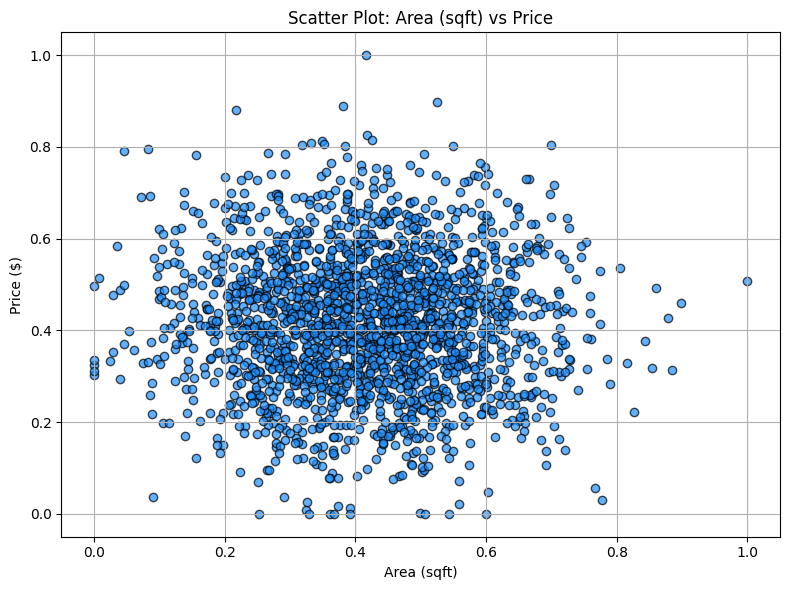

In [10]:
import matplotlib.pyplot as plt

# Scatter plot: Area_sqft vs Price
plt.figure(figsize=(8, 6))
plt.scatter(df['Area_sqft'], df['Price'], color='dodgerblue', edgecolor='k', alpha=0.7)
plt.title('Scatter Plot: Area (sqft) vs Price')
plt.xlabel('Area (sqft)')
plt.ylabel('Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

Reflection:

There is no strong correlation between area and price in this normalized dataset. This may possibly happen due to other influencing factors (like lot size). Consider checking the correlation matrix to confirm this observation statistically.

### 2.2.2. Correlation Matrix with Heatmap

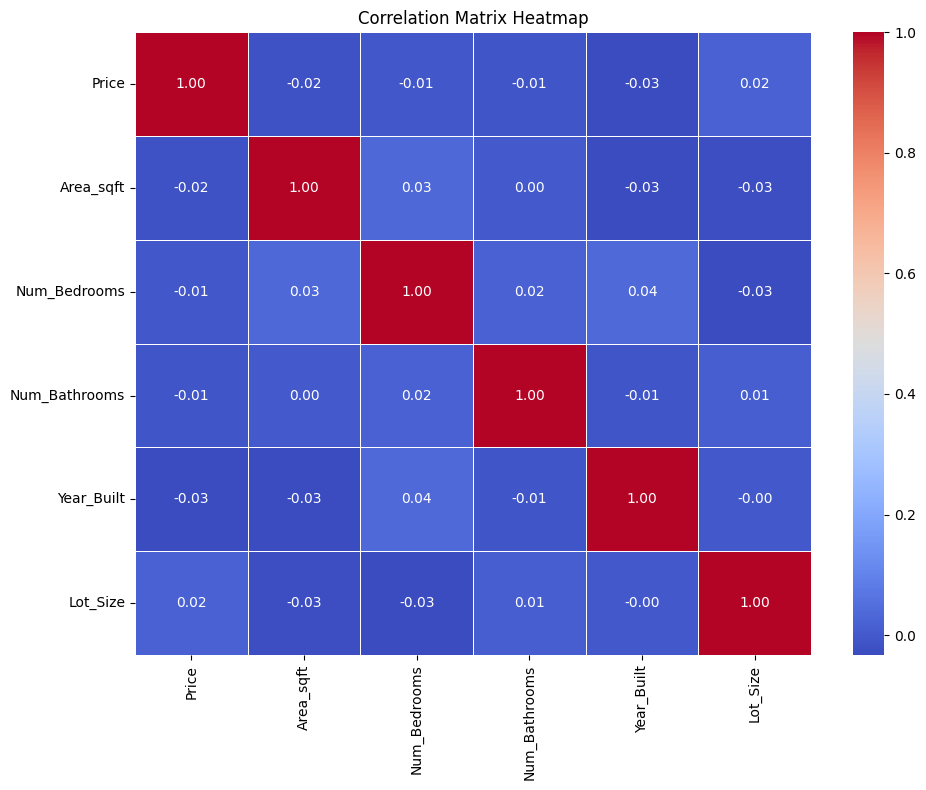

In [ ]:
# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()


### 2.2.3. Histogram

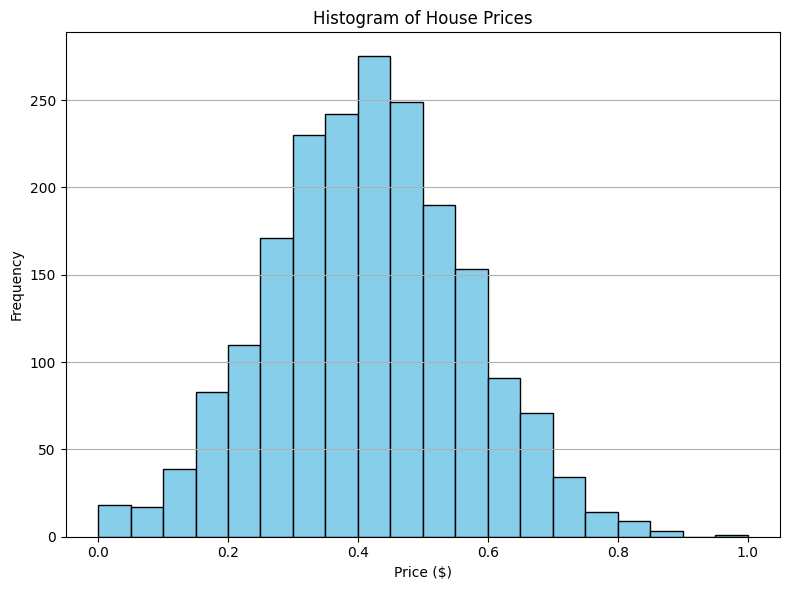

In [13]:
# Plot histogram for Price
plt.figure(figsize=(8, 6))
plt.hist(df['Price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of House Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Observations:

1. Most house prices are clustered in the low-to-mid normalized range (0.3–0.6).

2. The overall price distribution is fairly symmetrical, but with a slight skew toward higher-end prices.

### 2.2.4. Boxplots

C:\Users\User\AppData\Local\Temp\ipykernel_1452\1459105055.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[col] for col in numeric_columns], labels=numeric_columns, patch_artist=True,


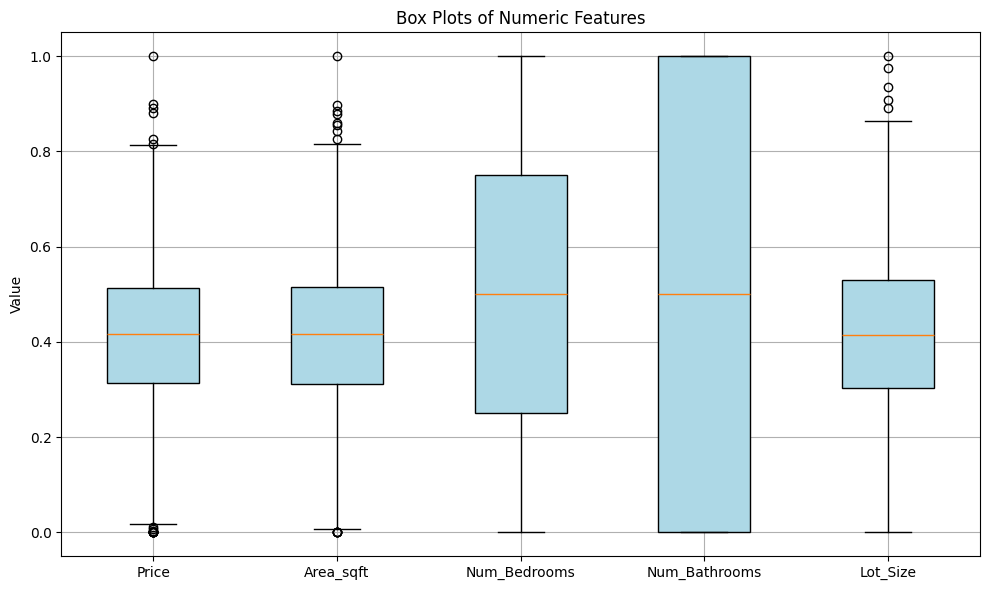

In [ ]:
numeric_columns = ['Price', 'Area_sqft', 'Num_Bedrooms', 'Num_Bathrooms', 'Lot_Size']

# Box plots for multiple columns
plt.figure(figsize=(10, 6))
plt.boxplot([df[col] for col in numeric_columns], labels=numeric_columns, patch_artist=True,
            boxprops=dict(facecolor='lightblue'))
plt.title('Box Plots of Numeric Features')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

2.2.5. Checking for Nulls and duplicates

In [17]:
print (df.isnull().sum())  # Check for missing values in each column
print(df.duplicated().sum())  # Check for duplicate rows

House_ID         0
Price            0
Area_sqft        0
Num_Bedrooms     0
Num_Bathrooms    0
Year_Built       0
Lot_Size         0
dtype: int64
0


As we can see, there are no null values. Talking about 0-values, we do have some now, but that is because the dataset is normalized and all the min_values for each feature are now 0 due to the formula.

Observations:

1. All features are normalized, allowing direct comparison.

2. Num_Bathrooms and Num_Bedrooms show the most variability.

3. Multiple features have outliers, which may affect modeling and should be considered for outlier handling or transformation.

### 🔎 Talking Point 1 — [Insert your review comment here]

Reviwed by:
- Name
- Name
- Name